In [ ]:
import os
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Set the directory path that you want to delete files from
dir_path = '/content/drive/MyDrive/Latency/'

# Set the file prefix that you want to delete
file_prefix = 'max_'

# Loop through all files and directories in the specified directory path
for root, dirs, files in os.walk(dir_path):
    for file in files:
        # Check if the file starts with the specified file prefix
        if file.startswith(file_prefix) or file.endswith(".png"):
            # Get the full file path
            file_path = os.path.join(root, file)
            # Delete the file
            os.remove(file_path)
            print(f"{file_path} deleted.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
graph_req = ['aggregatedEndToEndLatencyAvg', 'aggregatedEndToEndLatency50pct', 'aggregatedEndToEndLatency75pct',
             'aggregatedEndToEndLatency95pct', 'aggregatedEndToEndLatency99pct', 'aggregatedEndToEndLatency999pct',
             'aggregatedEndToEndLatency9999pct', 'aggregatedEndToEndLatencyMax']

x_axis_label = ['Average End-To-End Latency', '50th Percentile End-To-End Latency', '75th Percentile End-To-End Latency', 
                '95th Percentile End-To-End Latency', '99th Percentile End-To-End Latency', '99.9th Percentile End-To-End Latency',
                '99.99th Percentile End-To-End Latency', 'Max End-To-End Latency']

In [ ]:

import json
import os
from google.colab import drive

drive.mount('/content/drive')
json_dir = '/content/drive/MyDrive/Latency/'

throughput_dict = {}

for subdir, dirs, files in os.walk(json_dir):
    for file in files:
        if file.endswith('.json'):
            file_path = os.path.join(subdir, file)
            parent_dir_name = os.path.dirname(file_path)
            messageSize = parent_dir_name.split('/')[-1]
            # print(parent_dir_name.split('/')[-1])
            with open(file_path) as f:
                data = json.load(f)
                new_data = {}
                # messageSize = None
                driver = None
                for key, value in data.items():
                    if key == "messageSize":
                        # messageSize = value
                        new_data[key] = value
                        if str(messageSize) not in throughput_dict:
                          throughput_dict[str(messageSize)] = {}
                        for item in graph_req:
                          if item not in throughput_dict[str(messageSize)]:
                            throughput_dict[str(messageSize)][item] = []
                          continue
                    elif key == "driver":
                      driver = value
                      continue
                    if isinstance(value, list):
                        new_data[key] = max(value)
                        if key == "publishRate":
                            # new_data[key] *= messageSize
                            new_data[key] /= (1024 * 1024)
                    else:
                        if key in graph_req:
                          if key in throughput_dict[str(messageSize)]:
                            throughput_dict[str(messageSize)][str(key)].append({driver: value})
                        new_data[key] = value
                # set the path to the new file with the same name as the original file
                # new_file_path = os.path.join(subdir, f'max_{file}')
                # with open(new_file_path, 'w') as new_f:
                #     json.dump(new_data, new_f)

print(throughput_dict)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
{'6MBps': {'aggregatedEndToEndLatencyAvg': [{'RabbitMQ': 500.2881256589934}, {'Redis': 1.0735903524700843}, {'Artemis': 34.05488317908226}], 'aggregatedEndToEndLatency50pct': [{'RabbitMQ': 500.001}, {'Redis': 1.0}, {'Artemis': 31.0}], 'aggregatedEndToEndLatency75pct': [{'RabbitMQ': 750.003}, {'Redis': 1.0}, {'Artemis': 36.0}], 'aggregatedEndToEndLatency95pct': [{'RabbitMQ': 950.003}, {'Redis': 2.0}, {'Artemis': 60.0}], 'aggregatedEndToEndLatency99pct': [{'RabbitMQ': 990.003}, {'Redis': 2.0}, {'Artemis': 111.0}], 'aggregatedEndToEndLatency999pct': [{'RabbitMQ': 999.003}, {'Redis': 6.0}, {'Artemis': 201.0}], 'aggregatedEndToEndLatency9999pct': [{'RabbitMQ': 1000.003}, {'Redis': 11.0}, {'Artemis': 219.0}], 'aggregatedEndToEndLatencyMax': [{'RabbitMQ': 1000.003}, {'Redis': 17.0}, {'Artemis': 228.0}]}, '10MBps': {'aggregatedEndToEndLatencyAvg': [{'Artemis': 50.317

In [ ]:
# print(throughput_dict)
# Custom key function to convert MBps to a numerical value
def key_func(key):
    num_str = key.replace('MBps', '') # remove the 'MBps' suffix
    return int(num_str) # convert to integer

# Sort the dictionary by key using the custom key function
sorted_dict = {k: throughput_dict[k] for k in sorted(throughput_dict, key=key_func)}

# Output the sorted dictionary
print(sorted_dict)

{'1MBps': {'aggregatedEndToEndLatencyAvg': [{'RabbitMQ': 498.3229013298142}, {'Redis': 1.146114677883551}, {'Artemis': 21.00510360314382}], 'aggregatedEndToEndLatency50pct': [{'RabbitMQ': 507.001}, {'Redis': 1.0}, {'Artemis': 20.0}], 'aggregatedEndToEndLatency75pct': [{'RabbitMQ': 757.003}, {'Redis': 1.0}, {'Artemis': 21.0}], 'aggregatedEndToEndLatency95pct': [{'RabbitMQ': 950.003}, {'Redis': 2.0}, {'Artemis': 26.0}], 'aggregatedEndToEndLatency99pct': [{'RabbitMQ': 984.003}, {'Redis': 2.0}, {'Artemis': 44.0}], 'aggregatedEndToEndLatency999pct': [{'RabbitMQ': 987.003}, {'Redis': 6.0}, {'Artemis': 64.0}], 'aggregatedEndToEndLatency9999pct': [{'RabbitMQ': 989.003}, {'Redis': 8.0}, {'Artemis': 123.0}], 'aggregatedEndToEndLatencyMax': [{'RabbitMQ': 989.003}, {'Redis': 8.0}, {'Artemis': 123.0}]}, '3MBps': {'aggregatedEndToEndLatencyAvg': [{'Artemis': 33.48354094341473}, {'RabbitMQ': 500.55681764129366}, {'Redis': 1.1002142047125036}], 'aggregatedEndToEndLatency50pct': [{'Artemis': 31.0}, {'R

In [ ]:
# sorted_dict = {int(k): v for k, v in sorted(throughput_dict.items(), key=lambda item: int(item[0]))}
# print(sorted_dict)

In [ ]:
# size_latency_list = []
# for size, latency_dict in sorted_dict.items():
#     for latency_metric, latency_values in latency_dict.items():
#         for latency_value in latency_values:
#             for latency_provider, value in latency_value.items():
#                 size_latency_list.append({'size': size, 'latency_metric': latency_metric, 'latency_provider': latency_provider, 'value': value})


In [ ]:
%cd /content/drive/MyDrive/Latency/
!pwd
!mkdir latency_graphs
%cd latency_graphs
!pwd

/content/drive/MyDrive/Latency
/content/drive/MyDrive/Latency
mkdir: cannot create directory ‘latency_graphs’: File exists
/content/drive/MyDrive/Latency/latency_graphs
/content/drive/MyDrive/Latency/latency_graphs


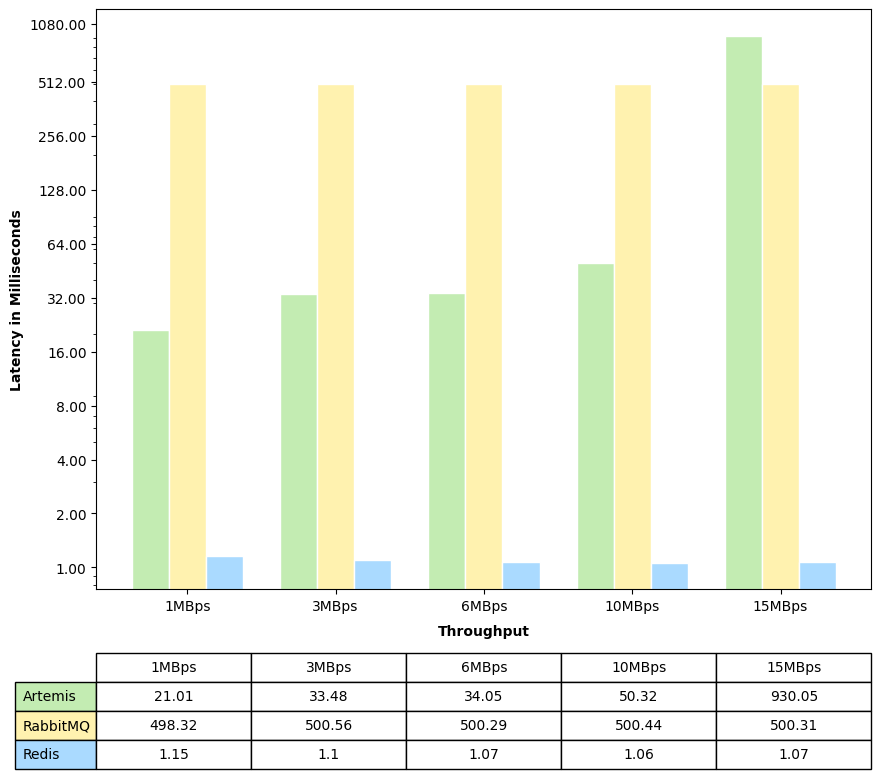

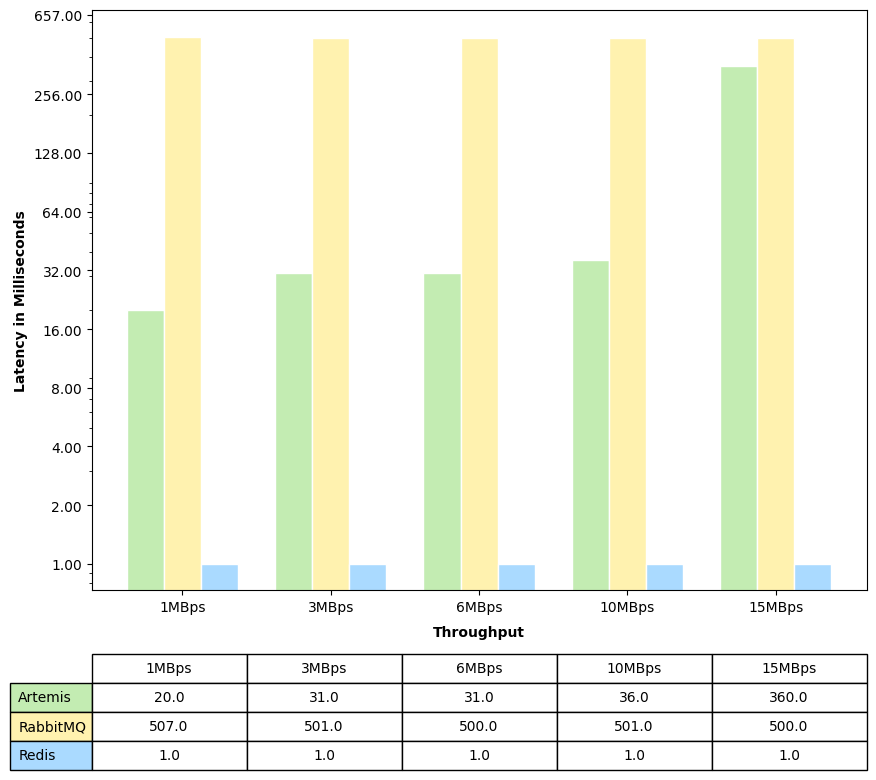

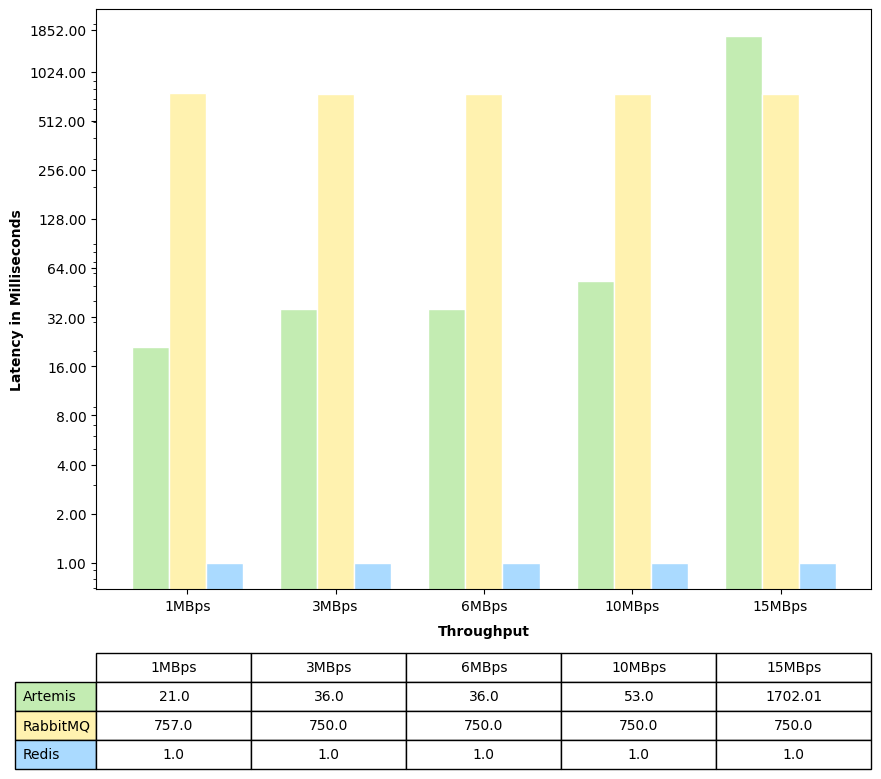

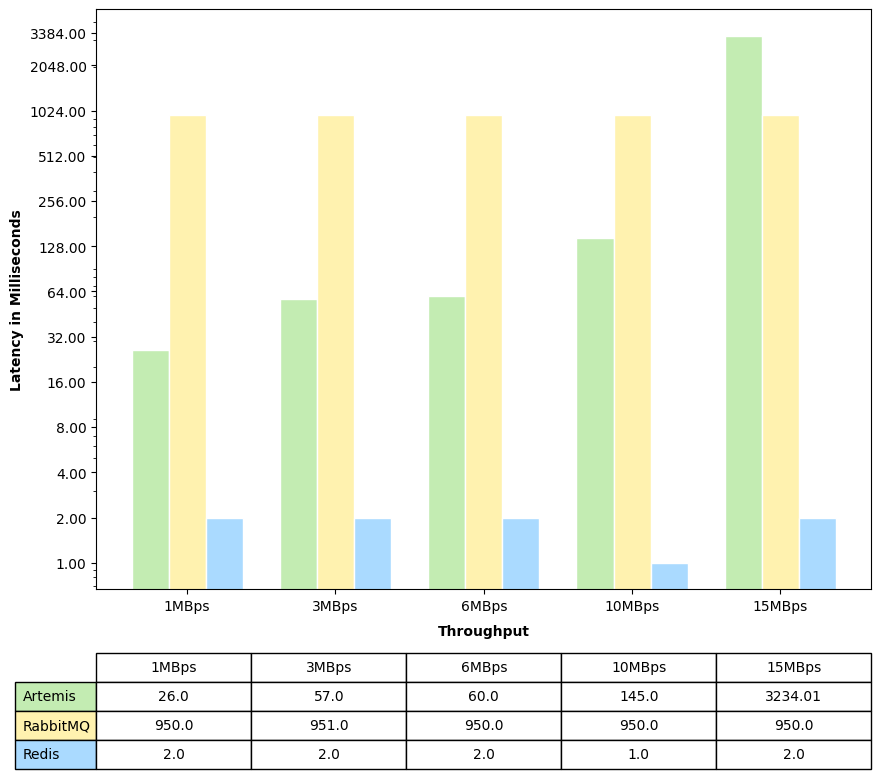

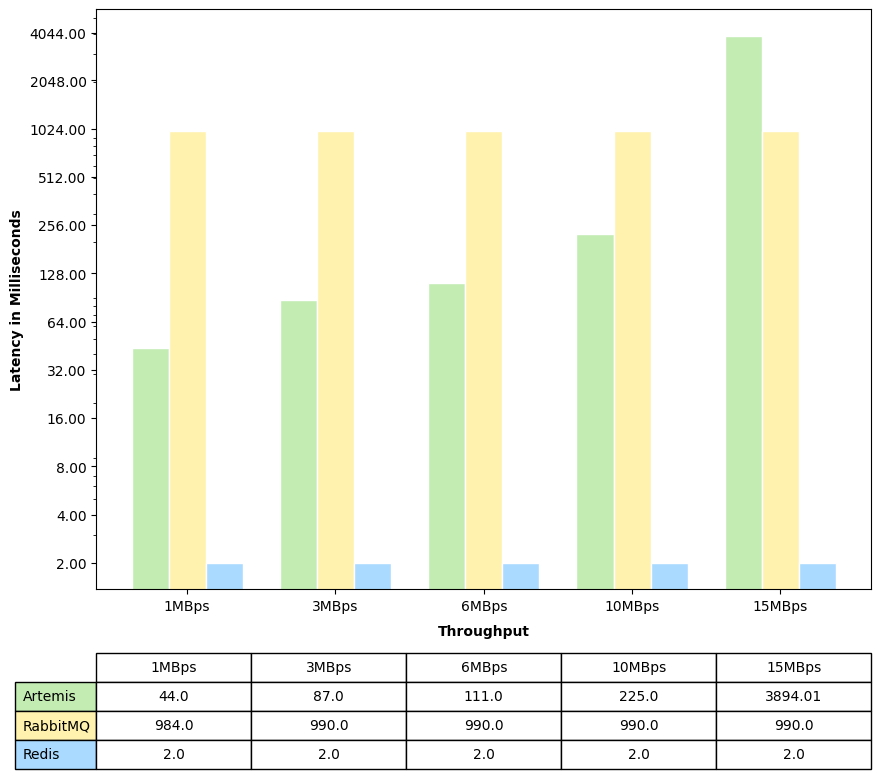

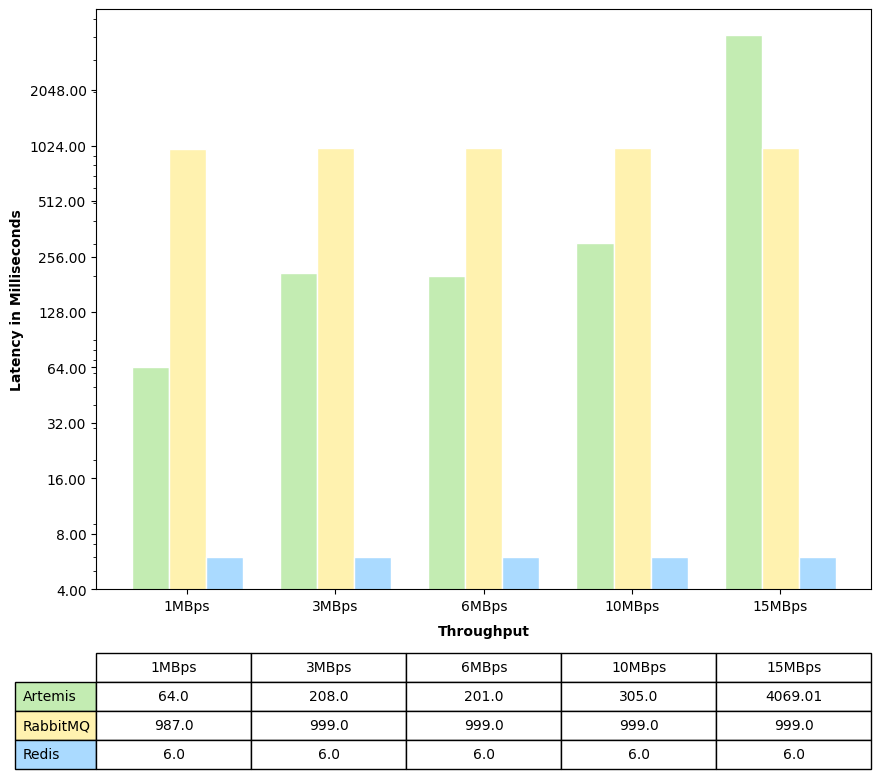

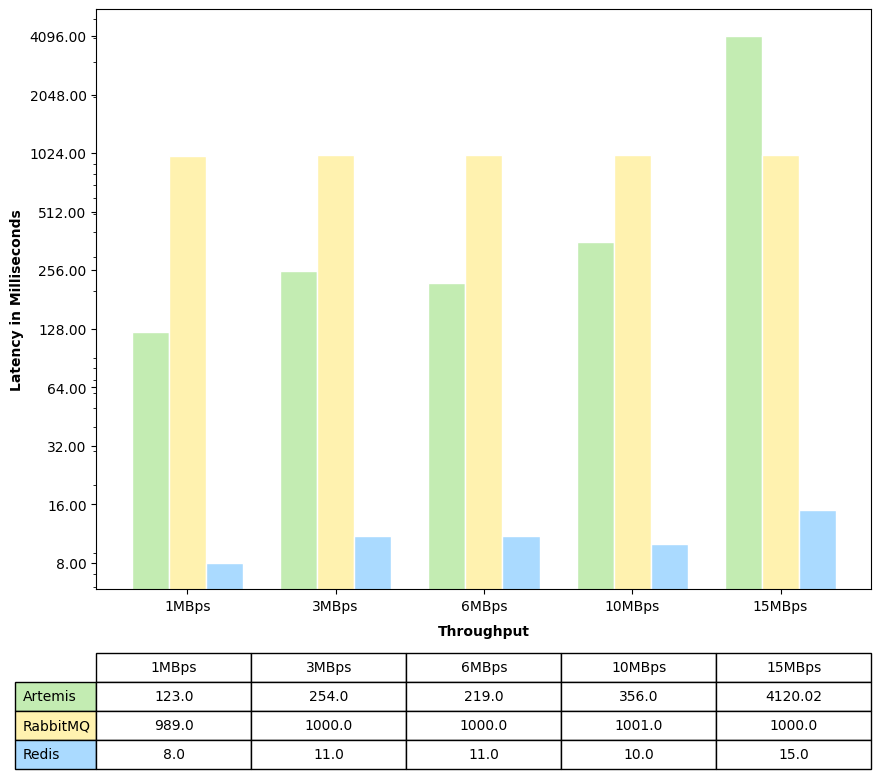

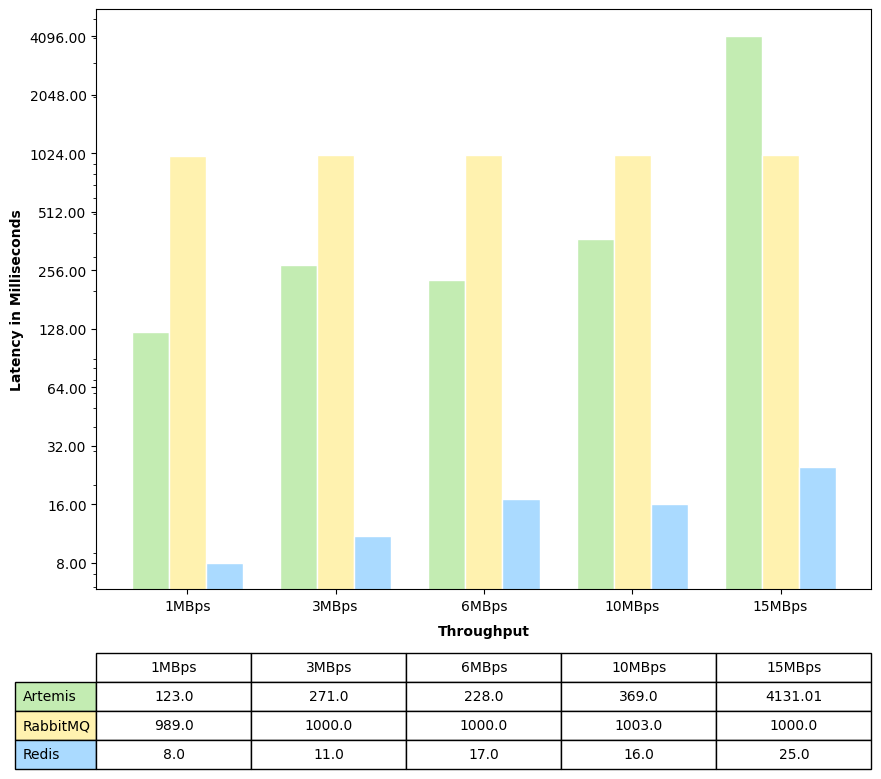

In [ ]:
# print(size_latency_list)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def visualize(artemis, rabbitmq, redis, cur_label):  

  # file_sizes = ['100B', '200B', '400B', '1KB', '2KB', '4KB']
  file_sizes = list(sorted_dict.keys())

  bar_width = 0.25
  r1 = np.arange(len(file_sizes))
  r2 = [x + bar_width for x in r1]
  r3 = [x + bar_width for x in r2]

  fig, ax = plt.subplots(figsize=(10, 10))

  # Make the plot
  artemis_bars = ax.bar(r1, artemis, color='#C3ECB2', width=bar_width, edgecolor='white', label='Artemis')
  rabbitmq_bars = ax.bar(r2, rabbitmq, color='#FFF2AF', width=bar_width, edgecolor='white', label='RabbitMQ')
  redis_bars = ax.bar(r3, redis, color='#AADAFF', width=bar_width, edgecolor='white', label='Redis')

  #AADAFF
  # Add xticks on the middle of the group bars
  ax.set_xlabel("Throughput", fontweight='bold')
  ax.set_ylabel('Latency in Milliseconds', fontweight='bold')
  ax.set_xticks([r + bar_width for r in range(len(file_sizes))])
  ax.set_xticklabels(file_sizes)
  ax.xaxis.labelpad = 8
  # ax.legend(loc='upper left')

  y_values = [artemis, rabbitmq, redis]
  legend_colors = ['#C3ECB2', '#FFF2AF', '#AADAFF']

  # Create custom legend rows
  legend_rows = [Line2D([0], [0], color=color, linewidth=4, linestyle='-') for color in legend_colors]

  y_min = 0.07
  y_max = 260
  
  y_min = min([min(lst) for lst in [artemis, rabbitmq, redis]])
  y_max = max([max(lst) for lst in [artemis, rabbitmq, redis]])

  ax.set_yscale('log')

  # y_ticks = [y_min] + [1, 5, 15, 30, 50, 90, 180, 250]
  y_ticks = [2**i for i in range(int(np.floor(np.log2(y_min))), int(np.ceil(np.log2(y_max))))]
  if y_max <= 4000:
    y_ticks += [int(y_max) + 150]
  y_tick_labels = [f"{y:.2f}" for y in y_ticks]
  ax.set_yticks(y_ticks)
  ax.set_yticklabels(y_tick_labels)


  ax.table(cellText=y_values,
          rowLabels=['Artemis', 'RabbitMQ', 'Redis'],
          rowColours=legend_colors,
          cellLoc='center',
          rowLoc='left',
          loc='bottom',
          bbox=[0, -0.31, 1, 0.2],
          colWidths=[0.1] * len(file_sizes),
          colLabels=file_sizes)

  # Adjust spacing between subplots
  plt.subplots_adjust(bottom=0.3)

  # Show plot
  # plt.show()

  if cur_label[-1] == '%':
    cur_label = cur_label.rstrip('%')
  plt.savefig(cur_label + '.pdf', dpi=300, bbox_inches='tight', facecolor='white')
  


def separate_data():
  for i in range(8):
    considering = graph_req[i]
    cur_label = x_axis_label[i]
    # print(considering)
    file_sizes = list(sorted_dict.keys())

    artemis = []
    rabbitmq = []
    redis = []
    new_dict = {'Artemis': 0, 'RabbitMQ': 1, 'Redis': 2}

    for size in file_sizes:
        key = size
        values = sorted_dict[key]
        for mitem, mvals in values.items():
          if mitem == considering:
            # print(mitem, mvals)
            for litem in mvals:
              for nkey, val in litem.items():
                idx = new_dict[nkey]
                if idx == 0: 
                  artemis.append(round(val, 2))
                elif idx == 1: 
                  rabbitmq.append(round(val, 2))
                elif idx == 2: 
                  redis.append(round(val, 2))
    
    # print(artemis)
    # print(rabbitmq)
    # print(redis)

    visualize(artemis, rabbitmq, redis, cur_label)
  return

separate_data()

In [ ]:
# considering = graph_req[7]
# cur_label = x_axis_label[7]
# # print(considering)
# file_sizes = list(sorted_dict.keys())

# artemis = []
# rabbitmq = []
# redis = []
# new_dict = {'Artemis': 0, 'RabbitMQ': 1, 'Redis': 2}

# for size in file_sizes:
#     key = size
#     values = sorted_dict[key]
#     for mitem, mvals in values.items():
#       if mitem == considering:
#         # print(mitem, mvals)
#         for litem in mvals:
#           for nkey, val in litem.items():
#             idx = new_dict[nkey]
#             if idx == 0: 
#               artemis.append(round(val, 2))
#             elif idx == 1: 
#               rabbitmq.append(round(val, 2))
#             elif idx == 2: 
#               redis.append(round(val, 2))


In [ ]:
# print(artemis)
# print(rabbitmq)
# print(redis)
# print(file_sizes)

In [ ]:

# # file_sizes = ['100B', '200B', '400B', '1KB', '2KB', '4KB']

# bar_width = 0.25
# r1 = np.arange(len(file_sizes))
# r2 = [x + bar_width for x in r1]
# r3 = [x + bar_width for x in r2]

# fig, ax = plt.subplots(figsize=(10, 6))

# # Make the plot
# artemis_bars = ax.bar(r1, artemis, color='#C3ECB2', width=bar_width, edgecolor='white', label='Artemis')
# rabbitmq_bars = ax.bar(r2, rabbitmq, color='#FFF2AF', width=bar_width, edgecolor='white', label='RabbitMQ')
# redis_bars = ax.bar(r3, redis, color='#AADAFF', width=bar_width, edgecolor='white', label='Redis')

# # Add xticks on the middle of the group bars
# ax.set_xlabel(cur_label, fontweight='bold')
# ax.set_ylabel('Latency in Milliseconds', fontweight='bold')
# ax.set_xticks([r + bar_width for r in range(len(file_sizes))])
# ax.set_xticklabels(file_sizes)
# ax.xaxis.labelpad = 70
# ax.legend(loc='upper left')

# y_values = [artemis, rabbitmq, redis]
# legend_colors = ['#C3ECB2', '#FFF2AF', '#AADAFF']

# # Create custom legend rows
# legend_rows = [Line2D([0], [0], color=color, linewidth=4, linestyle='-') for color in legend_colors]

# ax.table(cellText=y_values,
#          rowLabels=['Artemis', 'RabbitMQ', 'Redis'],
#         #  rowColours=legend_colors,
#          cellLoc='center',
#          rowLoc='left',
#          loc='bottom',
#          bbox=[0, -0.27, 1, 0.2],
#          colWidths=[0.1] * len(file_sizes),
#          colLabels=file_sizes)

# # Adjust spacing between subplots
# plt.subplots_adjust(bottom=0.3)

# # Show plot
# plt.show()